In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
import h5py
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

#Imports necessary libraries

In [2]:
path1 = '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_elevation/'
path2 = '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/'

#Defines paths for solar azimuth and elevation data

In [3]:
el_files = [path1 + "sun_el_m5",path1 + "sun_el_m4",path1 + "sun_el_m3",path1 + "sun_el_m2",path1 + "sun_el_m1",path1 + "sun_el_p1",path1 + "sun_el_p2",path1 + "sun_el_p3",path1 + "sun_el_p4",path1 + "sun_el_p5",path1 + "sun_el_p6",path1 + "sun_el_p7",path1 + "sun_el_p8",path1 + "sun_el_p9",path1 + "sun_el_p10"]
az_files = [path2 +"sun-9_0.dat",path2 +"sun-8_0.dat",path2 +"sun-7_0.dat",path2 +"sun-6_0.dat",path2 +"sun-5_0.dat",path2 +"sun-4_0.dat",path2 +"sun-3_0.dat",path2 +"sun-2_0.dat",path2 +"sun-1_0.dat",path2 +"sun0_0.dat",path2 +"sun1_0.dat",path2 +"sun2_0.dat",path2 +"sun3_0.dat",path2 +"sun4_0.dat",path2 +"sun5_0.dat",path2 +"sun6_0.dat",path2+ "sun7_0.dat",path2 +"sun8_0.dat",path2 +"sun9_0.dat",path2 +"sun10_0.dat"]

#Since the files are not named in a way that is easily sortable with a for loop, we manually enter the names in order
#from lowest to highest elevation and azimuth into two lists, respectively

In [4]:
az_spectra = [] #Creates an empty list to hold spectra from azimuth scans
el_spectra = [] #Creates an empty list to hold spectra from elevation scans

In [5]:
print(az_files)
print(el_files)

#Checkpoint: confirms that we appended azimuth and elevation files properly to the lists

['/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-9_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-8_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-7_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-6_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-5_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-4_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-3_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-2_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun-1_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/sun0_0.dat', '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/radio-astronomy/sun_azimuth/su

In [6]:
for az_file in az_files: #Pulls files individually from the list of azimuth files
    
    with open(az_file) as az_data: #Opens each file and adds it to a new list called az_data
        
        spectrum_rows = []    #Creates an empty list for spectral data
        
        for j, row in enumerate(az_data, start=1): #itterates through a row of the data 
            if j%4 == 0: #The modulus operator allows us to only take every fourth row of data
                spectrum_rows.append(row) #We now add each fourth row to our list of spectra
                
        tota_spectrum = np.zeros(1024) #Creates an array with 1024 zeros
        for row in spectrum_rows: 
            temp_spec = row.split(' ') #Splits rows, which are treated as strings
            spec = [] #Creates another empty list to hold spectral data
            for val in temp_spec: #Iterates over elements from the split list
                if val != '' and val != '\n': #Adds all flux values into the spectral list
                    spec.append(val) #Adds the actual flux values into the spectral list
                    
                    
            tota_spectrum = tota_spectrum + np.float64(spec) #Adds data from row to spectral data 
            
        az_spectra.append(tota_spectrum) #Appends tota_spectrum into the azimuth spectra list

In [7]:
#The below does the same as in the above cell but for elevation data

for el_file in el_files: 
    
    with open(el_file) as el_data: 
        
        spectrum_rows = []    
        
        for j, row in enumerate(el_data, start=1): 
            if j%4 == 0: 
                spectrum_rows.append(row) 
                
        tote_spectrum = np.zeros(1024) 
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val) 
                    
                    
            tote_spectrum = tote_spectrum + np.float64(spec) 
            
        el_spectra.append(tote_spectrum)

In [8]:
print(el_spectra)
#Checkpoint - confirms we did the above steps correctly for elevation data

[array([ 0.   ,  0.   ,  0.   , ..., 75.006, 74.96 , 75.204]), array([  0.   ,   0.   ,   0.   , ..., 147.005, 146.423, 146.424]), array([  0.   ,   0.   ,   0.   , ..., 133.494, 133.845, 133.468]), array([ 0.   ,  0.   ,  0.   , ..., 91.83 , 91.936, 92.068]), array([  0.   ,   0.   ,   0.   , ..., 166.321, 165.952, 166.057]), array([  0.   ,   0.   ,   0.   , ..., 223.955, 223.787, 223.904]), array([  0.   ,   0.   ,   0.   , ..., 308.307, 308.104, 305.773]), array([  0.   ,   0.   ,   0.   , ..., 247.128, 246.823, 245.717]), array([  0.   ,   0.   ,   0.   , ..., 233.124, 233.364, 232.679]), array([  0.   ,   0.   ,   0.   , ..., 134.583, 134.285, 134.569]), array([  0.   ,   0.   ,   0.   , ..., 159.618, 158.883, 158.085]), array([  0.   ,   0.   ,   0.   , ..., 128.866, 129.025, 128.643]), array([ 0.   ,  0.   ,  0.   , ..., 65.13 , 65.293, 64.913]), array([ 0.   ,  0.   ,  0.   , ..., 79.63 , 79.446, 79.445]), array([ 0.   ,  0.   ,  0.   , ..., 71.   , 70.487, 70.725])]


In [9]:
freq_arr = np.arange(1416,1426,0.009766)

#The frequency to pixel mapping shows the upper and lower limits of the spectrum to lie within the range
#1416-1426 MHz. The frequency step between each pixel, the bandwidth, is 0.009766. Therefore, we can convert our
#pixel locations to frequencies in MHz by transforming each pixel location by a factor of 0.009766 and placing
#them in the range [1416,1426]

In [10]:
freq_arr.shape

#Checkpoint: confirms our frequency array is one dimensional and has 1024 elements

(1024,)

Text(0,0.5,'Relative Flux [counts]')

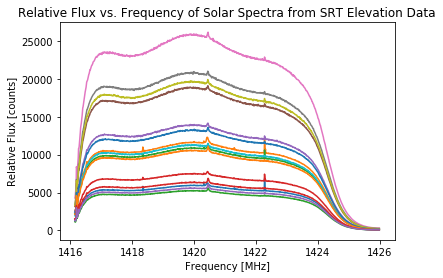

In [11]:
#Graph of relative flux vs. frequency for various elevation measurements

for i in range(len(el_spectra)):
    plt.plot(freq_arr[15:],el_spectra[i][15:])
    #This corrects for a spike that is found outside of the frequency range
plt.title("Relative Flux vs. Frequency of Solar Spectra from SRT Elevation Data")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux [counts]")

Text(0,0.5,'Relative Flux [counts]')

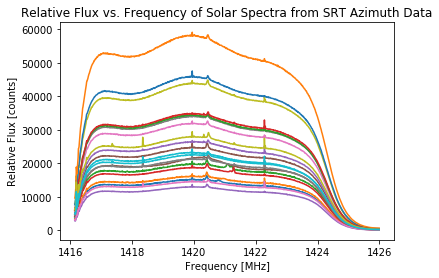

In [12]:
#Graph of relative flux vs. frequency for various azimuth measurements

for i in range(len(az_spectra)):
    plt.plot(freq_arr[15:],az_spectra[i][15:])
    #This corrects for a spike that is found outside of the frequency range
plt.title("Relative Flux vs. Frequency of Solar Spectra from SRT Azimuth Data")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux [counts]")

In [13]:
#Creates an elevation list of integrated values (total flux across the frequency range for a given elevation)

int_el = sc.trapz(freq_arr, el_spectra)

##Creates an azimuth list of integrated values (total flux across the frequency range for a given azimuth)

int_az = sc.trapz(freq_arr, az_spectra)

In [14]:
#Creates two lists to serve as the x axis values in future graphs. We will make each elevation (per original data)
#match up with its correct flux and plot them

elev = [-5,-4,-3,2,-1,1,2,3,4,5,6,7,8,9,10]
azim = [-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]

In [38]:
#Defines Gaussian curve for curve fit, where st is the standard deviation, mu is the mean, and a is the amplitude

def Gaus(x,st,mu,a):
    return (a/(st*(2*np.pi)**0.5))*np.exp((-0.5)*((x-mu)/st)**2)

In [50]:
#Curve fit for elevation

st0,mu0,a0 = (4,0,3000)
x1 = elev
y1 = int_el
coeffs, fiterr = curve_fit(Gaus, x1, y1, p0 = (st0,mu0,a0))

Text(0,0.5,'Total Flux [counts]')

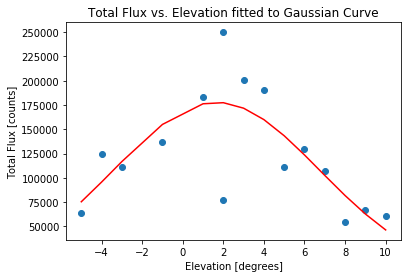

In [51]:
#Plots integrated flux over 1416-1424 MHz vs. Elevation fitted to a Gaussian Curve

plt.plot(elev, int_el,'o')
plt.plot(np.sort(x1), Gaus(np.sort(x1),coeffs[0],coeffs[1], coeffs[2]), 'r', label = 'Gaussian Fit')
plt.title("Total Flux vs. Elevation fitted to Gaussian Curve")
plt.xlabel("Elevation [degrees]")
plt.ylabel("Total Flux [counts]")

In [52]:
#We now define our values for the standard deviation, mean, and amplitude given our curve fit

st = coeffs[0]
mu = coeffs[1]
a = coeffs[2]

print(st)
print(mu)
print(a)

5.085348242183874
1.6626325768850152
2266230.9641055968


In [67]:
#We now find the full width at half maximum estimate for elevation
FWHMel = (2*(2*np.log(2))**0.5)*st
print(FWHMel)

11.975079976657488


In [69]:
#This value is not in the correct units, however. To convert to degrees, we perform the following:

FWHM1 = ((4*np.log(2))/np.pi)*(1/FWHMel)*(360/((np.pi)*2))
print(FWHM1)

4.222598504135065


In [54]:
#Curve fit for azimuth

sta0,mua0,aa0 = (4,0,3000)
x2 = azim
y2 = int_az
coeffs, fiterr = curve_fit(Gaus, x2, y2, p0 = (sta0,mua0,aa0))

Text(0,0.5,'Total Flux [counts]')

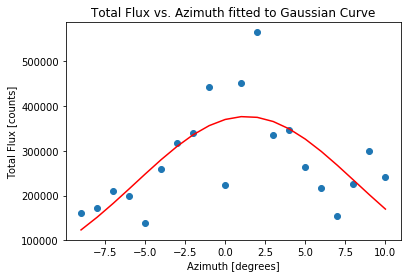

In [44]:
#Plots integrated flux over 1416-1424 MHz vs. Azimuth fitted to a Gaussian Curve

plt.plot(azim, int_az, 'o')
plt.plot(np.sort(x2), Gaus(np.sort(x2),coeffs[0],coeffs[1], coeffs[2]), 'r', label = 'Gaussian Fit')
plt.title("Total Flux vs. Azimuth fitted to Gaussian Curve")
plt.xlabel("Azimuth [degrees]")
plt.ylabel("Total Flux [counts]")

In [47]:
#We find the values of st, mu, and a

sta = coeffs[0]
mua = coeffs[1]
aa = coeffs[2]

print(sta)
print(mua)
print(aa)

6.888704939488599
1.3012179170948175
6503293.381030927


In [59]:
#We now find the Full Width at Half Maximum estimate for azimuth
#1/FWHM*(4ln2/pi)
FWHMaz = (2*(2*np.log(2))**0.5)*sta
print(FWHMaz)

16.221660475811465


In [65]:
#We convert to degrees just as we did for our elevation estimate

FWHM2 = ((4*np.log(2))/np.pi)*(1/FWHMaz)*(360/((np.pi)*2))

print(FWHM2)

3.1171873478508485


In [70]:
#The angular diameter of the sun is approximately 32' or 0.53 degrees
#Our resolution is far too large to be able to resolve the sun